In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv ')

In [4]:
data.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [5]:
data.shape

(158, 12)

In [6]:
print("There are {:,} rows ".format(data.shape[0]) + "and {} columns in our data".format(data.shape[1]))

There are 158 rows and 12 columns in our data


In [7]:
data.set_index('Country', inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, Switzerland to Togo
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         158 non-null    object 
 1   Happiness Rank                 158 non-null    int64  
 2   Happiness Score                158 non-null    float64
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 14.8+ KB


In [9]:
data.isnull().sum()

Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [10]:
NULLS = data[data.isnull().any(axis=1)]

In [11]:
NULLS.head()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,


In [12]:
data.dropna(inplace=True)

In [13]:
data.duplicated().sum()

0

In [14]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [15]:
data.sort_values(by="Happiness Rank", ascending=False).head(10)

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172


 Indexing and grouping

In [16]:
WHR_Region = data.groupby('Region')

In [17]:
WHR_Region['Happiness Score'].describe().sort_values(by="mean",ascending=True).head(10)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Sub-Saharan Africa,40.0,4.202800,0.609557,2.839,3.75600,4.272,4.58075,5.477
Southern Asia,7.0,4.580857,0.570526,3.575,4.39250,4.565,4.94400,5.253
Southeastern Asia,9.0,5.317444,0.950020,3.819,4.87600,5.360,5.77000,6.798
Central and Eastern Europe,29.0,5.332931,0.570446,4.218,4.95900,5.286,5.81300,6.505
Middle East and Northern Africa,20.0,5.406900,1.101382,3.006,4.70775,5.262,6.32400,7.278
Eastern Asia,6.0,5.626167,0.554053,4.874,5.22350,5.729,5.98625,6.298
Latin America and Caribbean,22.0,6.144682,0.728560,4.518,5.84050,6.149,6.64600,7.226
Western Europe,21.0,6.689619,0.824582,4.857,6.30200,6.937,7.37800,7.587
North America,2.0,7.273000,0.217789,7.119,7.19600,7.273,7.35000,7.427


In [18]:
data[data["Region"]=="Europe"].head()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,


In [19]:
data = data.replace('Europe', 'Eastern Europe')

In [20]:
WHR_Region['Happiness Score'].describe().sort_values(by="mean",ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Australia and New Zealand,2.0,7.285000,0.001414,7.284,7.28450,7.285,7.28550,7.286
North America,2.0,7.273000,0.217789,7.119,7.19600,7.273,7.35000,7.427
Western Europe,21.0,6.689619,0.824582,4.857,6.30200,6.937,7.37800,7.587
Latin America and Caribbean,22.0,6.144682,0.728560,4.518,5.84050,6.149,6.64600,7.226
Eastern Asia,6.0,5.626167,0.554053,4.874,5.22350,5.729,5.98625,6.298
Middle East and Northern Africa,20.0,5.406900,1.101382,3.006,4.70775,5.262,6.32400,7.278
Central and Eastern Europe,29.0,5.332931,0.570446,4.218,4.95900,5.286,5.81300,6.505
Southeastern Asia,9.0,5.317444,0.950020,3.819,4.87600,5.360,5.77000,6.798
Southern Asia,7.0,4.580857,0.570526,3.575,4.39250,4.565,4.94400,5.253


In [23]:
data_A = data[data['Region'] == 'Africa']
data_WE = data[data['Region'] == 'Western Europe']
data_EE = data[data['Region'] == 'Eastern Europe']
data_LA = data[data['Region'] == 'Latin America']
data_AP = data[data['Region'] == 'Asia-Pacific']
data_NA = data[data['Region'] == 'North America']

In [24]:
len(data_A[data_A['Happiness Score'] > 6])

0

In [25]:
print("There are {} countries in Africa that have a happiness score above 6.0 ".format(len(data_A[data_A['Happiness Score'] > 6])))

There are 0 countries in Africa that have a happiness score above 6.0 


In [26]:
len(data_WE[data_WE['Happiness Score'] > 6])

16

In [27]:
print("There are {} countries in Western Europe that have a happiness score above 6.0 ".format(len(data_WE[data_WE['Happiness Score'] > 6])))

There are 16 countries in Western Europe that have a happiness score above 6.0 


In [28]:
len(data_EE[data_EE['Happiness Score'] > 6])

0

In [30]:
print("There is {} country in Eastern Europe that has a happiness score above 6.0 ".format(len(data_EE[data_EE['Happiness Score'] > 6])))

There is 0 country in Eastern Europe that has a happiness score above 6.0 


In [31]:
len(data_AP[data_AP['Happiness Score'] > 6])

0

In [32]:
len(data_LA[data_LA['Happiness Score'] > 6])

0

In [33]:
len(data_NA[data_NA['Happiness Score'] > 6])

2

In [34]:
print("There are {} countries in the North America that have a happiness score above 6.0 ".format(len(data_NA[data_NA['Happiness Score'] > 6])))

There are 2 countries in the North America that have a happiness score above 6.0 


In [35]:
Delta_NA = data_NA.max(axis=0)['Happiness Score'] - data_NA.min(axis=0)['Happiness Score']
print(Delta_NA)

0.30799999999999983


In [36]:
Delta_EE = data_EE.max(axis=0)['Happiness Score'] - data_EE.min(axis=0)['Happiness Score']
print(Delta_EE)

nan


In [37]:
Delta_WE = data_WE.max(axis=0)['Happiness Score'] - data_WE.min(axis=0)['Happiness Score']
print(Delta_WE)

2.7299999999999995


In [38]:
Delta_A = data_A.max(axis=0)['Happiness Score'] - data_A.min(axis=0)['Happiness Score']
print(Delta_A)

nan


In [39]:
Delta_LA = data_LA.max(axis=0)['Happiness Score'] - data_LA.min(axis=0)['Happiness Score']
print(Delta_LA)

nan


In [40]:
Delta_AP = data_AP.max(axis=0)['Happiness Score'] - data_AP.min(axis=0)['Happiness Score']
print(Delta_AP)

nan


In [41]:
Deltas = {}

In [42]:
Deltas["North America"] = Delta_NA
Deltas["Eastern Europe"] = Delta_EE
Deltas["Western Europe"] = Delta_WE
Deltas["Africa"] = Delta_A
Deltas["Latin America"] = Delta_LA
Deltas["Asia Pacific"] = Delta_AP

In [43]:
print("The {} region seems to have the largest range of happiness scores".format(max(Deltas, key=Deltas.get)))

The Western Europe region seems to have the largest range of happiness scores


 Bar plot of the Happiness Score

Text(0.5, 1.0, 'Happiness Score of the top 10 Countries')

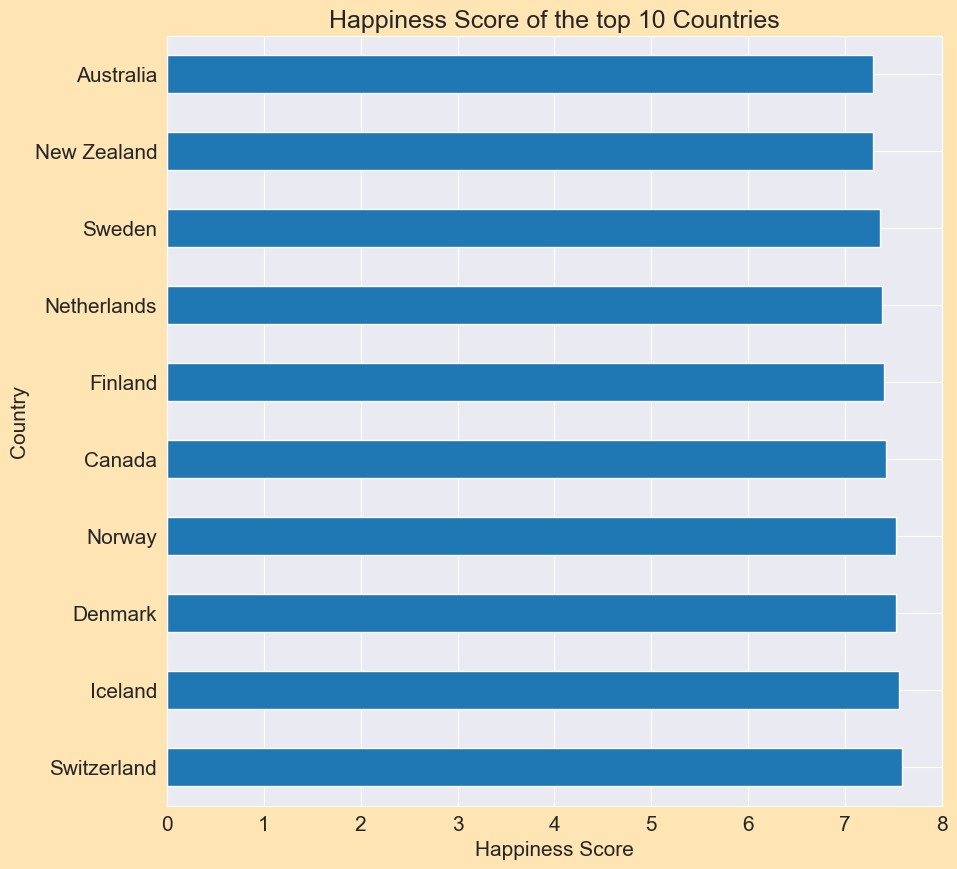

In [44]:
data['Happiness Score'].head(10).plot(xticks=np.arange(9), kind='barh', figsize= (10, 10))
plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')

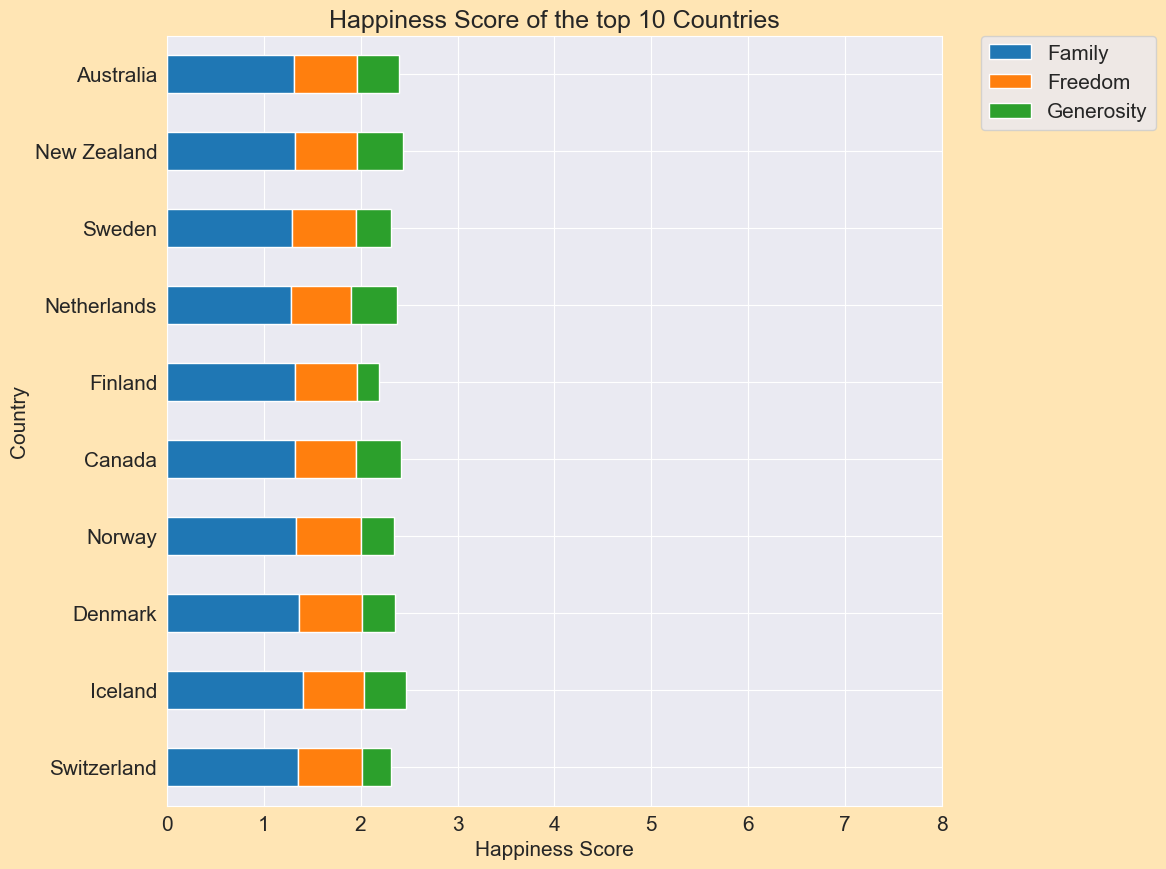

In [47]:
data[['Family','Freedom','Generosity']].head(10).plot(kind='barh',
xticks=np.arange(9), stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Histogram of Job Satisfaction

Text(0.5, 1.0, 'Distribution of Dystopia Residual')

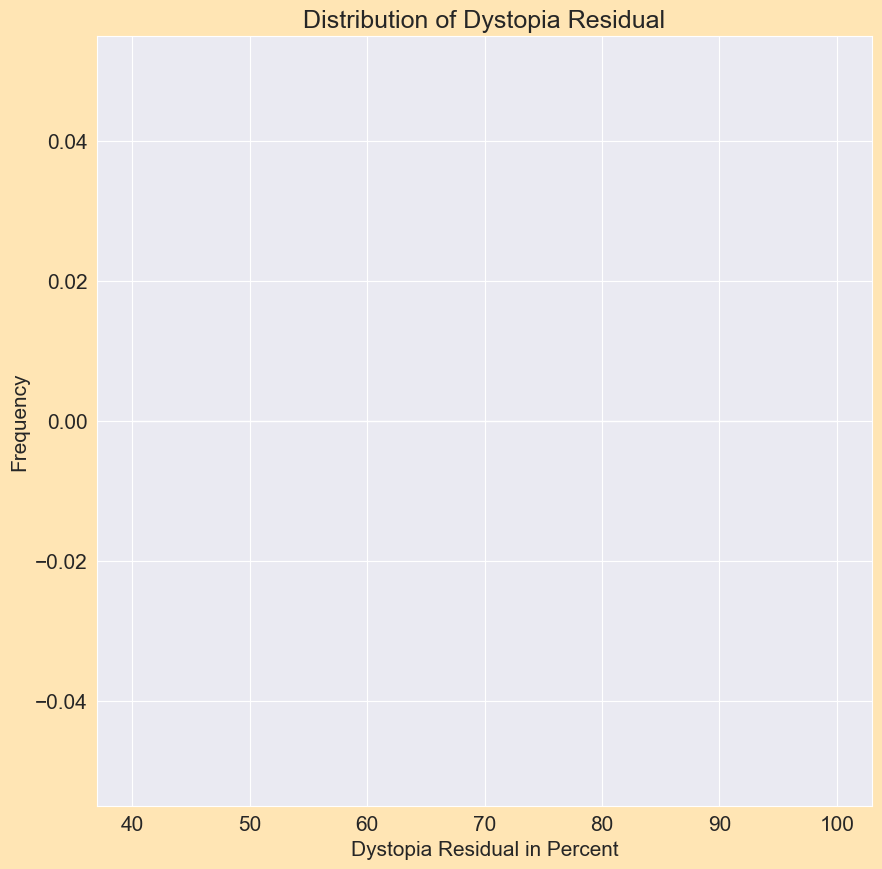

In [52]:
data['Dystopia Residual'].plot(kind='hist', bins=[ 40, 50, 60, 70, 80, 90, 100], figsize=(10,10))

plt.xlabel("Dystopia Residual in Percent")
plt.title("Distribution of Dystopia Residual")

Pairwise Scatter plots

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


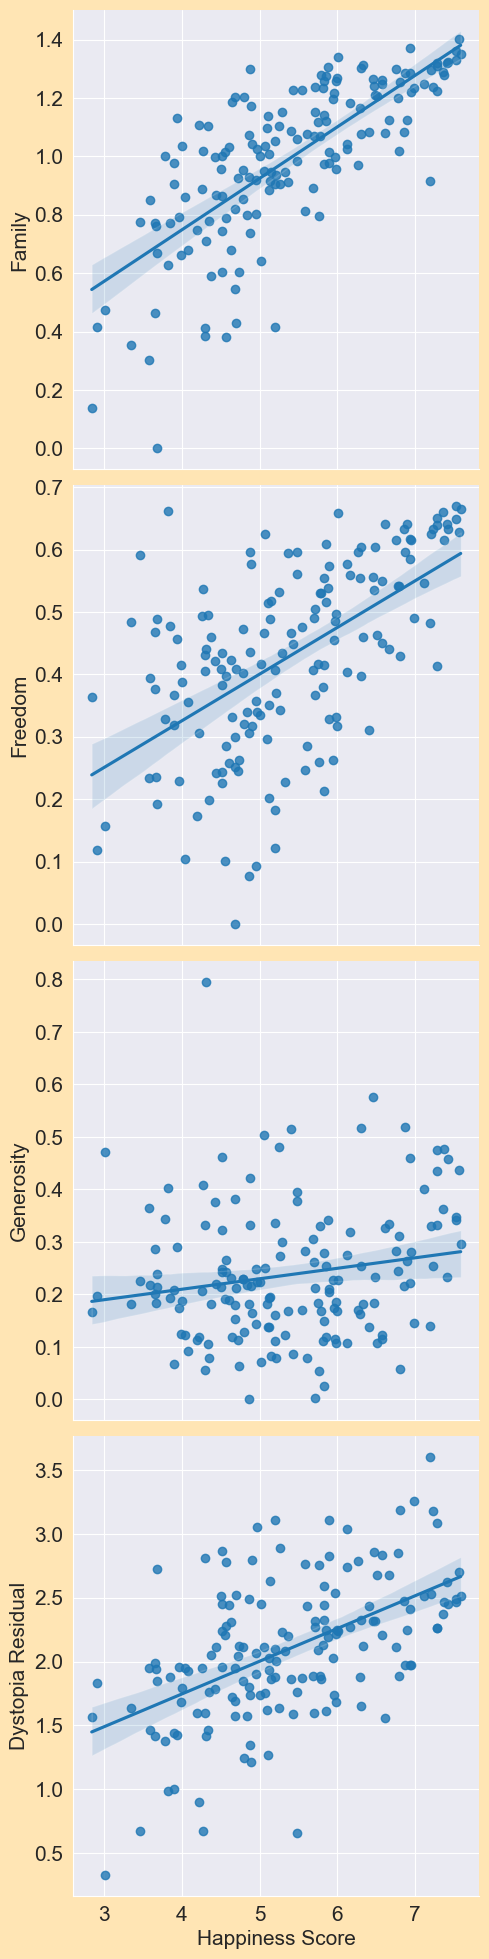

In [54]:
sns.pairplot(data=data, kind='reg', size = 5,
                  x_vars=['Happiness Score'],
                  y_vars=['Family','Freedom', 'Generosity','Dystopia Residual'])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


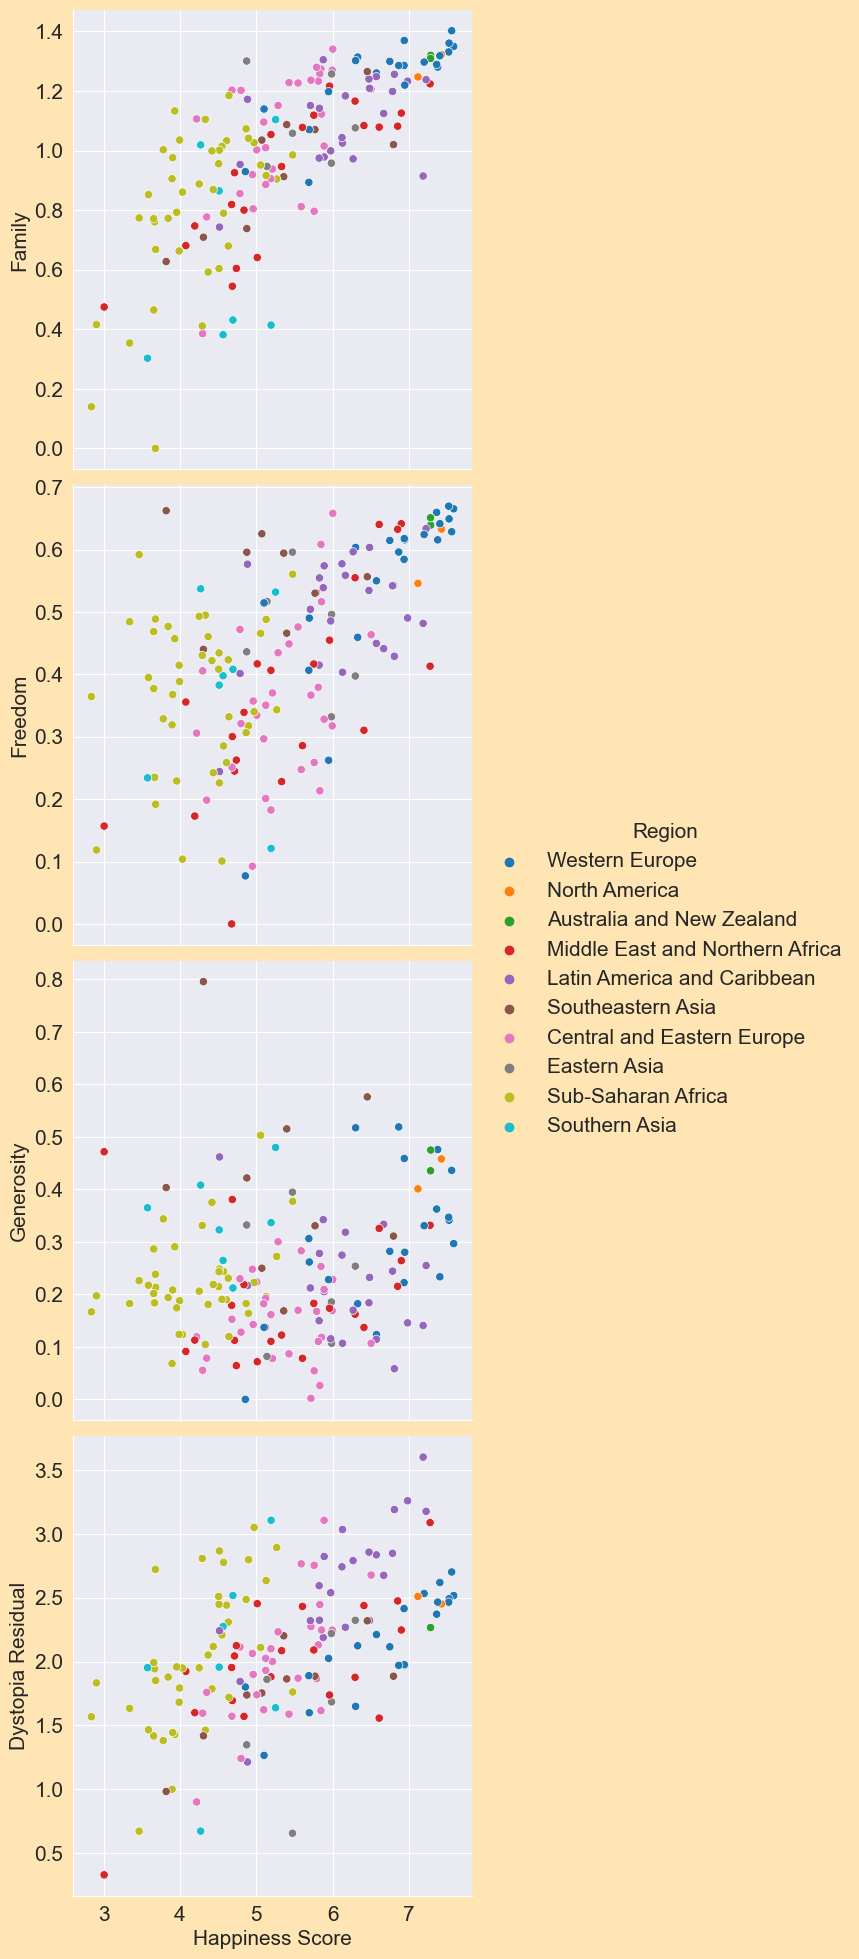

In [55]:
sns.pairplot(data=data, size = 5, hue='Region',
                  x_vars=['Happiness Score'],
                  y_vars=['Family','Freedom', 'Generosity', 'Dystopia Residual'])

 Probabilities

In [57]:
data[data['Happiness Score'] > 6].shape[0]

44

In [58]:
data[(data['Happiness Score'] > 6) & (data['Region'] == 'Western Europe')].shape[0]

16

In [60]:
float(len(data[(data['Happiness Score'] > 6) & (data['Region'] == 'Western Europe')]))/float(len(data[data['Happiness Score'] > 6]))

0.36363636363636365

In [61]:
print("The probability that a randomly selected country with happiness score over 6.0 is form Western Europe is {0:.0%}".format(float(data[(data['Happiness Score'] > 6) & (data['Region'] == 'Western Europe')].shape[0]

)/float(data[data['Happiness Score'] > 6].shape[0])))

The probability that a randomly selected country with happiness score over 6.0 is form Western Europe is 36%


 Matrices

In [62]:
data.shape

(158, 11)

In [63]:
Western_Europe = []
Eastern_Europe = []
North_America = []
Latin_America = []
Asia_Pacific = []
Africa = []

In [64]:
for x in data['Region']:
    if x == 'Western Europe':
         Western_Europe.append(1)
    else: Western_Europe.append(0)

In [65]:
for x in data['Region']:
    if x == 'Eastern Europe':
         Eastern_Europe.append(1)
    else: Eastern_Europe.append(0)

In [66]:
for x in data['Region']:
    if x == 'North America':
         North_America.append(1)
    else: North_America.append(0)

In [67]:
for x in data['Region']:
    if x == 'Latin America':
         Latin_America.append(1)
    else: Latin_America.append(0)

In [68]:
for x in data['Region']:
    if x == 'Asia-Pacific':
         Asia_Pacific.append(1)
    else: Asia_Pacific.append(0)

In [69]:
for x in data['Region']:
    if x == 'Africa':
         Africa.append(1)
    else: Africa.append(0)

In [70]:
Matrix = pd.DataFrame(index=data.index)

In [71]:
Matrix['Western Europe'] = Western_Europe
Matrix['Eastern Europe'] = Eastern_Europe
Matrix['North America'] = North_America
Matrix['Latin America'] = Latin_America
Matrix['Asia Pacific'] = Asia_Pacific
Matrix['Africa'] = Africa

In [72]:
Matrix.head(20)

,Western Europe,Eastern Europe,North America,Latin America,Asia Pacific,Africa
Country,,,,,,
Switzerland,1,0,0,0,0,0
Iceland,1,0,0,0,0,0
Denmark,1,0,0,0,0,0
Norway,1,0,0,0,0,0
Canada,0,0,1,0,0,0
Finland,1,0,0,0,0,0
Netherlands,1,0,0,0,0,0
Sweden,1,0,0,0,0,0
New Zealand,0,0,0,0,0,0
